<a href="https://colab.research.google.com/github/berryboom/dap-2024/blob/main/les06/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №6. Линейная регрессия

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в ваш репозиторий github в директорию ./les06
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Набор данных Diabetes (Диабет) содержит 442 образца с 10-ю признаками: возраст, пол, индекс массы тела, средний показатель давления крови и шесть измерений сыворотки крови. Целевое значение - количественный показатель прогрессирования заболевания через год после анализов.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Извлечение данных

In [ ]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

1. Выведете описание набора данных и наименование признаков.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Загрузка данных
diabetes = datasets.load_diabetes()

# Вывод описания набора данных
print(diabetes.DESCR)

# Вывод наименований признаков
print("Наименования признаков:", diabetes.feature_names)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### Подготовка данных

2. Из загруженного набора данных создайте DataFrame, содержащий как признаки, так и целевое значение. Выведите первые 5 строк набора.

In [ ]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Вывод первых 5 строк набора данных
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


3. Выведете информацию о типах данных в наборе. Имеются ли в наборе категориальные признаки? Имеются ли в наборе данные имеющие значение null?

In [ ]:
categorical_features = df.select_dtypes(include=['object']).columns
if len(categorical_features) == 0:
    print("В наборе данных нет категориальных признаков.")
else:
    print("Категориальные признаки:", categorical_features.tolist())

# Проверка на наличие значений null
null_values = df.isnull().sum()
if null_values.sum() == 0:
    print("В наборе данных нет значений null.")
else:
    print("Количество значений null в каждом столбце:\n", null_values)

В наборе данных нет категориальных признаков.
В наборе данных нет значений null.


## Исследование данных

4. Постройте матрицу корреляции.

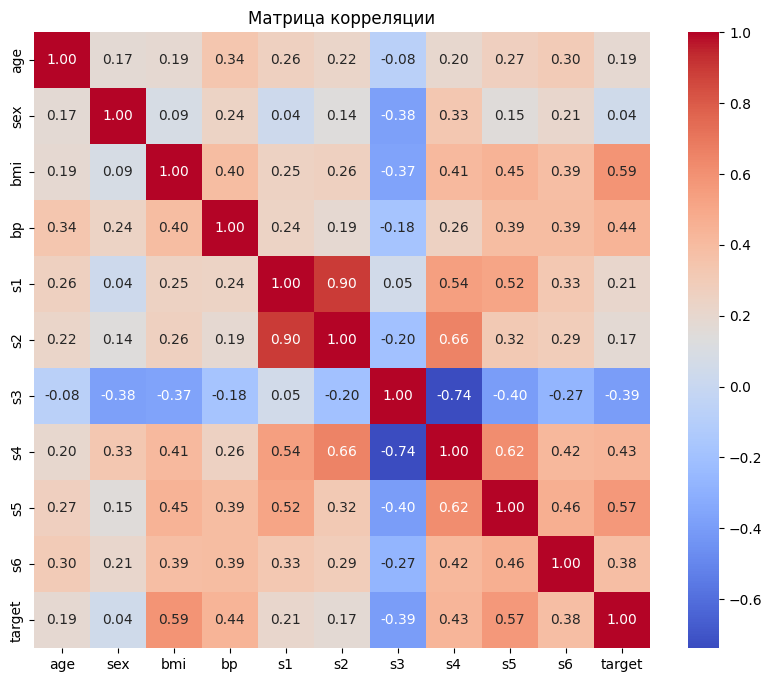

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Загрузка данных
diabetes = datasets.load_diabetes()

# Создание DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Построение матрицы корреляции
correlation_matrix = df.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Матрица корреляции')
plt.show()

5. Постройте диаграмму рассеяния целевого значение и признака, коэффициент корреляции которого с  целевым значением, самый высокий.

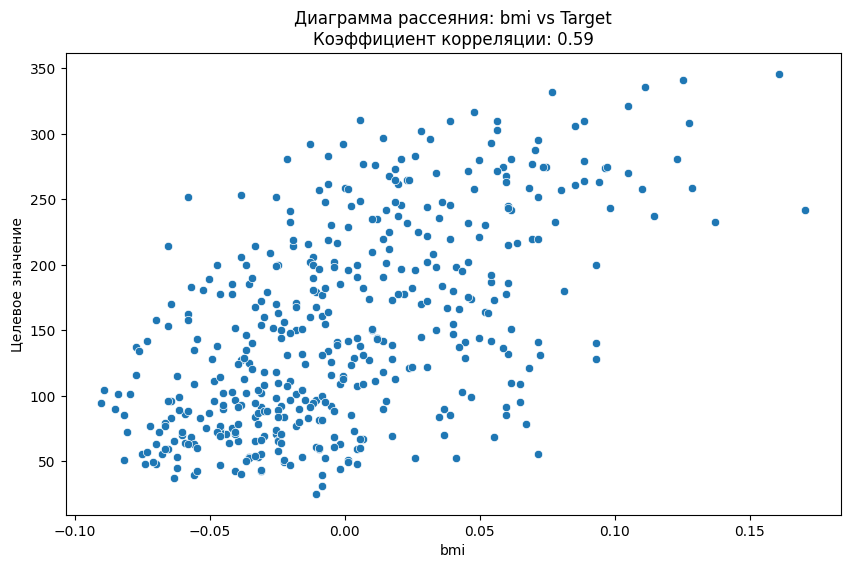

In [ ]:
# Загрузка данных
diabetes = datasets.load_diabetes()

# Создание DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Вычисление коэффициентов корреляции
correlation_matrix = df.corr()
target_correlation = correlation_matrix['target'].drop('target')

# Находим признак с наивысшей корреляцией
highest_correlation_feature = target_correlation.idxmax()
highest_correlation_value = target_correlation.max()

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=highest_correlation_feature, y='target')
plt.title(f'Диаграмма рассеяния: {highest_correlation_feature} vs Target\n'
          f'Коэффициент корреляции: {highest_correlation_value:.2f}')
plt.xlabel(highest_correlation_feature)
plt.ylabel('Целевое значение')
plt.show()

6. Сформируйте набор признаков (X) из 5 признаков с самым высоким коэффициентом корреляции с целевым значением. Сформируйте набор для целевого значения (y).

In [ ]:
diabetes = datasets.load_diabetes()

# Создание DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Вычисление коэффициентов корреляции
correlation_matrix = df.corr()

# Извлечение корреляций целевого значения с другими признаками
target_correlation = correlation_matrix['target'].drop('target')

# Находим 5 признаков с наивысшей корреляцией
top_5_features = target_correlation.nlargest(5).index

# Формируем набор признаков (X) и набор для целевого значения (y)
X = df[top_5_features]
y = df['target']

# Выводим результаты
print("Набор признаков (X):")
print(X.head())
print("\nЦелевое значение (y):")
print(y.head())

Набор признаков (X):
        bmi        s5        bp        s4        s6
0  0.061696  0.019907  0.021872 -0.002592 -0.017646
1 -0.051474 -0.068332 -0.026328 -0.039493 -0.092204
2  0.044451  0.002861 -0.005670 -0.002592 -0.025930
3 -0.011595  0.022688 -0.036656  0.034309 -0.009362
4 -0.036385 -0.031988  0.021872 -0.002592 -0.046641

Целевое значение (y):
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


## Предсказательная модель

7. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Загрузка данных
diabetes = datasets.load_diabetes()

# Создание DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Формируем набор признаков (X) и набор для целевого значения (y)
X = df.drop(columns='target')
y = df['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Выводим размеры полученных наборов
print("Размер обучающей выборки (X_train):", X_train.shape)
print("Размер тестовой выборки (X_test):", X_test.shape)
print("Размер обучающей выборки (y_train):", y_train.shape)
print("Размер тестовой выборки (y_test):", y_test.shape)

Размер обучающей выборки (X_train): (331, 10)
Размер тестовой выборки (X_test): (111, 10)
Размер обучающей выборки (y_train): (331,)
Размер тестовой выборки (y_test): (111,)


8. Выполните обучение модели.

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных
diabetes = datasets.load_diabetes()

# Создание DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Формируем набор признаков (X) и набор для целевого значения (y)
X = df.drop(columns='target')
y = df['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print("Среднеквадратичная ошибка (MSE):", mse)
print("Коэффициент детерминации (R^2):", r2)

Среднеквадратичная ошибка (MSE): 2848.3106508475053
Коэффициент детерминации (R^2): 0.4849058889476756


## Проверка модели

9. Расчитайте Root mean squared error (RMSE)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных
diabetes = datasets.load_diabetes()

# Создание DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Формируем набор признаков (X) и набор для целевого значения (y)
X = df.drop(columns='target')
y = df['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Расчет RMSE
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print("Среднеквадратичная ошибка (MSE):", mse)
print("Корень среднеквадратичной ошибки (RMSE):", rmse)
print("Коэффициент детерминации (R^2):", r2)


Среднеквадратичная ошибка (MSE): 2848.3106508475053
Корень среднеквадратичной ошибки (RMSE): 53.369566710321955
Коэффициент детерминации (R^2): 0.4849058889476756


10. Расчитайте R² (коэффициент детерминации)

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка данных
diabetes = datasets.load_diabetes()

# Создание DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Формируем набор признаков (X) и набор для целевого значения (y)
X = df.drop(columns='target')
y = df['target']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Расчет RMSE
r2 = r2_score(y_test, y_pred)  # Расчет R²

# Вывод результатов
print("Среднеквадратичная ошибка (MSE):", mse)
print("Корень среднеквадратичной ошибки (RMSE):", rmse)
print("Коэффициент детерминации (R²):", r2)

Среднеквадратичная ошибка (MSE): 2848.3106508475053
Корень среднеквадратичной ошибки (RMSE): 53.369566710321955
Коэффициент детерминации (R²): 0.4849058889476756


## Вопросы для защиты

1. Какие типы машинного обучения вы знаете?
2. Чем отличается обучение с учителем и без учителя?
3. Чем пакетное обучение отличается от динамического?
4. Чем обучение на основе образцов отличается от обучения на основе модели?
5. Что такое линейная регрессия?
6. Что такое градиентный спуск?
7. Как правильно обрабатывать категориальные признаки?
8. Что такое матрица корреляции?
9. Что показывает метрика RMSE?
10. Что показывает метрика R²?